#### 라면의 신 한스 리네시의 라면 레이팅 데이터 분석
- 데이터셋 : 2002년 부터 2022년까지 한스 리네시가 매긴 4000여개의 라면 평점 데이터
- 한국에서 높은 평점을 받은 라면 데이터 브랜드와 특징 분석
- 한국에서 출시 라면 추천
- 과정
    * 데이터파일 확인 
        - 첫번째 줄이 컬럼명이 맞는지 확인 
        - 불필요한 컬럼이나 행이 있는지 확인
    * 전처리 : 데이터 정리 및 손질
        - 파일 확인 후 체크한 사항 진행
        - 결측치 처리 
        - 이상치 처리
        - 중복데이터 처리
        - 형변환 : 실제 데이터와 타입 일치
    * 데이터 분석
        - 탐색적 분석 : 주어진 데이터를 기반으로 의미를 찾아내는 것
        - 시각화 및 분석 결과 텍스트 요약 정리

#### 폰트 

In [155]:
# [0] 폰트지정
def set_customFont(font_path):
    from matplotlib import font_manager as fm,rc
 
# 폰트 패밀리 이름 가져오기
    font_name = fm.FontProperties(fname = font_path).get_name()

# 새로운 폰트 패밀리 이름 지정
    rc('font',family = font_name)

set_customFont(r'C:\Windows\Fonts\malgunbd.ttf')

#### 모듈 불러오기 및 기본 데이터 확인 및 처리

In [156]:
### https://www.theramenrater.com/

In [157]:
# [1] 모듈
import pandas as pd  
import matplotlib.pyplot as plt  
import missingno as msno
import numpy as np

In [158]:
# [2] 데이터 불러오기
ramen_DF = pd.read_csv(r'C:\Users\a\Desktop\mini_project\세번째 라면 분석\The-Big-List-20231127-Reviews-to-4650.csv')

In [159]:
# 데이터 확인 
# 리뷰 번호/ 브랜드/ 맛 평가/ 패키징 방식/ 생산 나라/ 별점/
ramen_DF.head(5)

,Review #,Brand,Variety,Style,Country,Stars,T
0,4650,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5,NaN
1,4649,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5,NaN
2,4648,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5,NaN
3,4647,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5,NaN
4,4646,Samyang Foods,Samyand Ramen,Pack,United States,5,NaN


In [160]:
# 불필요한 컬럼이나 행이 있는지 확인 후 삭제
ramen_DF = ramen_DF.drop('T',axis=1)

#### 전처리

In [161]:
# 전체 밸류 확인 후 타겟 데이터 다루기
def check_counrty(data,colmnus):
    print(data[colmnus].value_counts())

check_counrty(ramen_DF,'Country')

Country
Japan                 953
United States         722
South Korea           462
Taiwan                446
China                 334
Malaysia              253
Thailand              241
Hong Kong             209
Indonesia             195
Singapore             155
Vietnam               138
UK                     82
Canada                 56
Philippines            53
India                  48
Germany                38
Brazil                 32
Mexico                 32
Australia              26
Netherlands            16
Bangladesh             15
Pakistan               15
Myanmar                14
Nepal                  14
Hungary                 9
Poland                  6
France                  6
Colombia                6
Sarawak                 5
Russia                  5
Cambodia                5
Serbia                  5
Peru                    4
Italy                   4
Fiji                    4
Holland                 4
Ireland                 4
Finland                 3
Swed

In [162]:
# 타겟 데이터 오타 확인
# Country에서 South_korea 확인 결과 총 462개 확인 
# 하지만 'souh korea' 라는 잘못된 입력 데이터 하나 발견!
# 처리해서 'south_korea'로 고치겠습니다.
# 이후 타겟 데이터를 뽑아내겠습니다
ramen_DF[ramen_DF['Country'] == 'Souh Korea']
ramen_DF.loc[1216,'Country'] = 'South Korea'

In [163]:
# 바뀐거 확인
check_counrty(ramen_DF,'Country')

Country
Japan                 953
United States         722
South Korea           463
Taiwan                446
China                 334
Malaysia              253
Thailand              241
Hong Kong             209
Indonesia             195
Singapore             155
Vietnam               138
UK                     82
Canada                 56
Philippines            53
India                  48
Germany                38
Mexico                 32
Brazil                 32
Australia              26
Netherlands            16
Bangladesh             15
Pakistan               15
Myanmar                14
Nepal                  14
Hungary                 9
Poland                  6
France                  6
Colombia                6
Cambodia                5
Serbia                  5
Sarawak                 5
Russia                  5
Holland                 4
Ireland                 4
Italy                   4
Peru                    4
Fiji                    4
Finland                 3
Swed

In [164]:
# 타겟데이터 뽑기
target_DF = ramen_DF[ramen_DF['Country'] == 'South Korea']

In [165]:
target_DF.shape

(463, 6)

<Axes: >

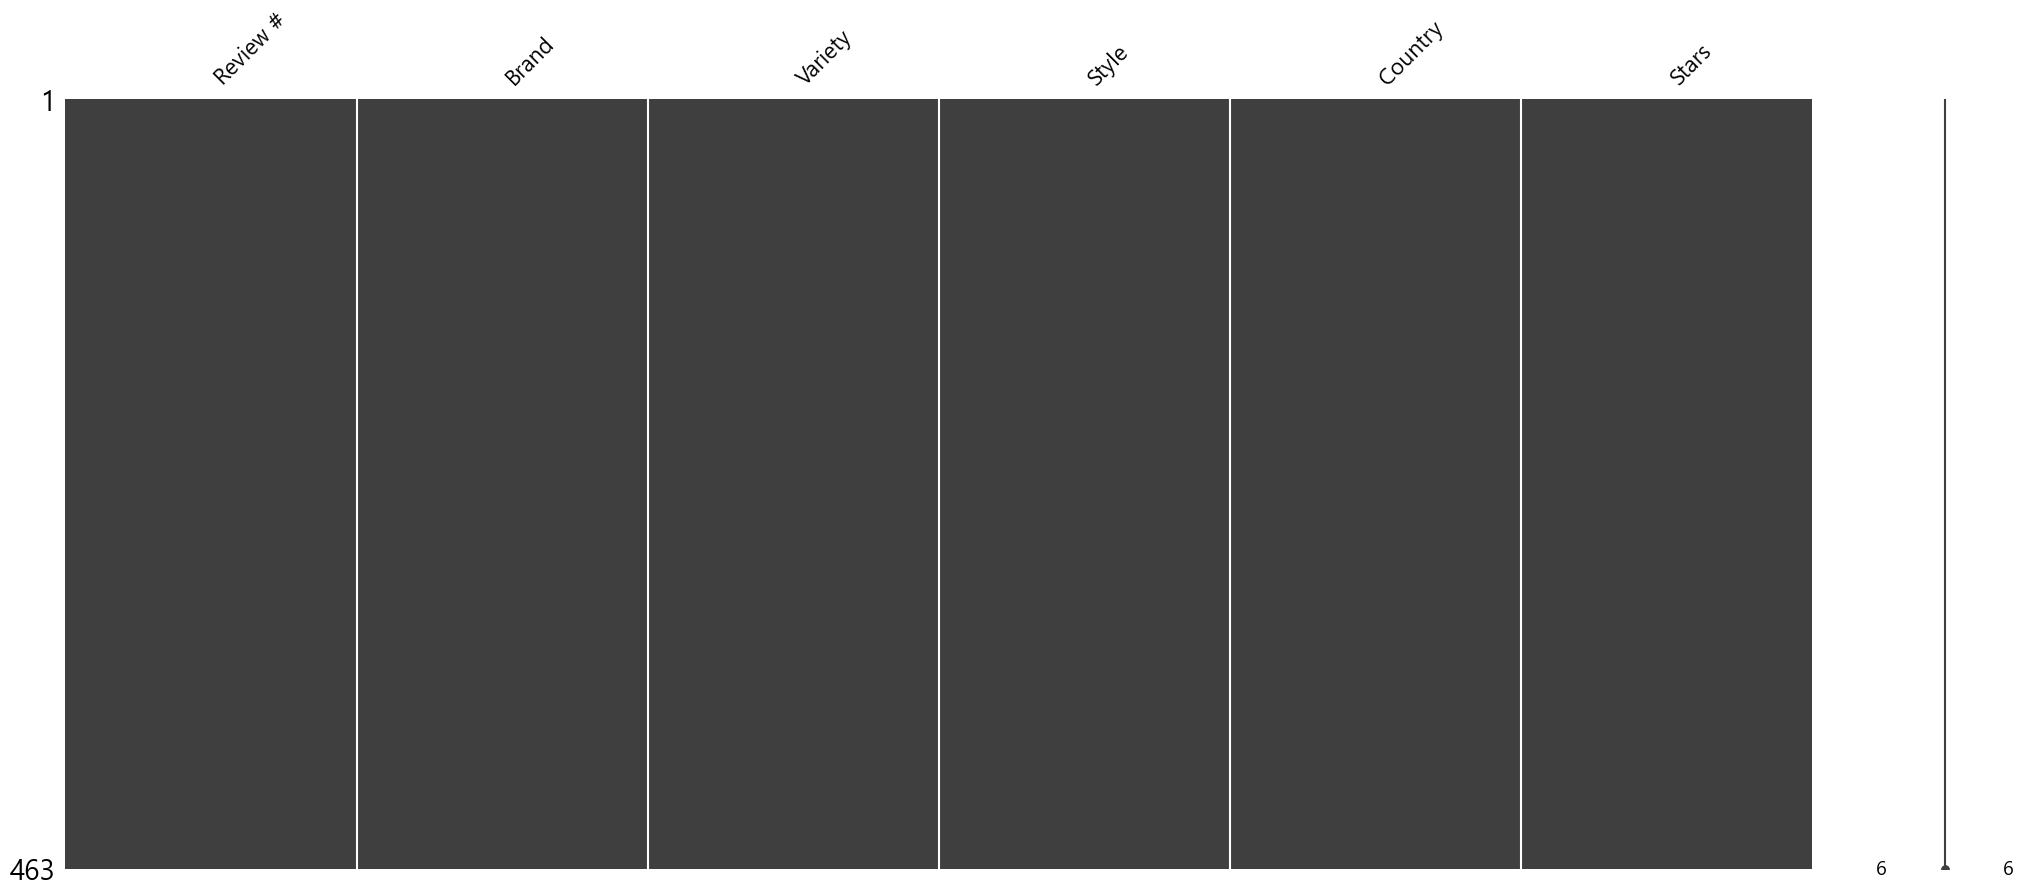

In [166]:
# 결측치 확인
msno.matrix(target_DF)
# ==> 없는 깨끗한 데이터

In [167]:
# Stars 항목에서 
target_DF['Stars'].value_counts()

Stars
5          86
4          78
3.75       75
3.5        72
4.5        34
4.25       29
3.25       20
3          11
2          10
4.75       10
2.5         9
2.75        7
2.25        4
1           3
Unrated     2
0           2
1.1         2
1.25        1
1.5         1
0.5         1
3.125       1
1.75        1
4.125       1
2.8         1
2.9         1
1.8         1
Name: count, dtype: int64

In [168]:
# Unrated인 친구들을 확인해보니 점수가 없을 수 밖에 없는 사리 인 친구들인 것을 확인 삭제 진행
# https://www.theramenrater.com/2017/09/11/2548-ottogi-plain-instant-noodle/     (2548)
# https://www.theramenrater.com/2017/05/31/2458-samyang-foods-sari-ramen/        (2458)
def check_score(score):
    print(target_DF[target_DF['Stars']==score])

In [169]:
check_score('Unrated')

      Review #          Brand                                Variety Style  \
2102      2548         Ottogi  Plain Instant Noodle No Soup Included  Pack   
2192      2458  Samyang Foods                             Sari Ramen  Pack   

          Country    Stars  
2102  South Korea  Unrated  
2192  South Korea  Unrated  


In [170]:
target_DF = target_DF.drop([2102,2192])

In [171]:
# 지워진 것 확인
check_score('Unrated')

Empty DataFrame
Columns: [Review #, Brand, Variety, Style, Country, Stars]
Index: []


In [172]:
# 박스플롯을 그려보고 이상치가 있다면 확인해보겠습니다
# 'stars 칼럼의 데이터 타입을 int로 변환하겠습니다 (현재는 object)
target_DF['Stars']

16        5
26      4.5
39      1.5
75        5
117       5
       ... 
4634    3.5
4635    2.5
4636    3.5
4639      2
4641      2
Name: Stars, Length: 461, dtype: object

In [173]:
target_DF = target_DF.astype({'Stars': 'float'})

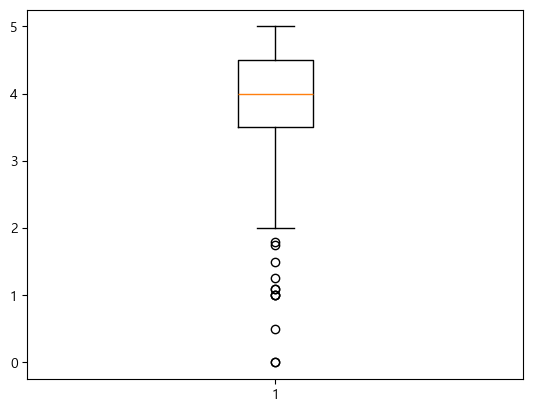

In [174]:
plt.boxplot(x= target_DF['Stars'])
plt.show()

In [175]:
# 혹시 몰라서 0 점인 것을 확인한 결과 딱히 이상한 점수는 아니였습니다.
# https://www.theramenrater.com/2016/04/27/2017-samyang-foods-honey-cheese-big-bowl/    (2017)
check_score('0')

Empty DataFrame
Columns: [Review #, Brand, Variety, Style, Country, Stars]
Index: []


In [176]:
# Brand 도 확인
# Samyang Foods 과 Samyang 은 같은 것이므로 합칠것.
check_counrty(target_DF,'Brand')

Brand
Samyang Foods    108
Paldo             88
Nongshim          67
Ottogi            51
Samyang           19
                ... 
Easybab            1
Neko               1
No Brand           1
Guava Story        1
Sutah              1
Name: count, Length: 63, dtype: int64


In [177]:
def name_change(target_name,change_name):
    brand_name = target_DF[target_DF['Brand'] == change_name].index.tolist()
    for i in brand_name:
        target_DF.loc[i,'Brand'] = target_name

In [178]:
# Samyang을 Samyang Foods로 변경
brand_name = target_DF[target_DF['Brand'] == "Samyang"].index.tolist()
for i in brand_name:
    target_DF.loc[i,'Brand'] = 'Samyang Foods'

In [179]:
name_change('O Sung','Ohsung')
name_change("O'Taste","O'taste")
name_change('GS Retail','GS25')
name_change('ChoripDong','Chorip Dong')
name_change('Sura','Surasang')
name_change('The Han Kitchen','The Han Kitchen')

In [180]:
# Ohsung / O Sung // O'taste / O'Taste // GS25 / GS Retail // Chorip Dong / ChoripDong // Surasang / Sura // 
# The Han Kitchen / The Han Kitchen // 

In [181]:
# 확인결과 대세에 큰 영향을 끼치진 않았다.
check_counrty(target_DF,'Brand')

Brand
Samyang Foods             127
Paldo                      88
Nongshim                   67
Ottogi                     51
Wang                       12
Pulmuone                    8
Emart                       7
Rhee Bros Assi              6
Jongga                      6
Six Fortune                 6
Sempio                      5
HoMyeonDang                 5
O'Taste                     4
Mr. Udon                    4
O Sung                      4
GS Retail                   3
Pink Rocket                 3
Han's South Korea           3
Samlip                      2
Being Blue                  2
CJ CheilJedang              2
ChoripDong                  2
Foodmon                     2
Hi-Myon                     2
Gookmul                     2
Yopokki                     2
Bon Go Jang                 2
Sura                        2
Nu Rea                      2
Dongwon                     2
GB Company                  2
Good Tto Leu Foods          1
The Han Kitchen             1
Song

In [182]:
target_DF

,Review #,Brand,Variety,Style,Country,Stars
16,4634,The Han Kitchen,Budae Ramyun,Pack,South Korea,5.0
26,4624,Samyang Foods,Buldak Basil & Cream Udon,Bowl,South Korea,4.5
39,4611,Samyang Foods,Buldak Hot Chicken Stir-fried Noodles Jjajang,Bowl,South Korea,1.5
75,4575,Nongshim,Shin Ramyun Bokkeummyeon,Pack,South Korea,5.0
117,4533,Ottogi,Jin Jjambbong Spicy Seafood Noodle,Pack,South Korea,5.0
...,...,...,...,...,...,...
4634,16,Samyang Foods,Kalgug-Su (Spicy),Pack,South Korea,3.5
4635,15,Samyang Foods,Pojangmacha U-dong,Pack,South Korea,2.5
4636,14,Samyang Foods,Hot,Pack,South Korea,3.5
4639,11,Six Fortune,Chicken Flavor Instant Soup Noodle,Pack,South Korea,2.0


In [183]:
# 다행히 중복치는 없었다
target_DF.iloc[:,1:].duplicated().sum()

0

#### 시각화
- [1] 점수 분포
- [2] 브랜드별
- [3] 점수별 텍스트 확인

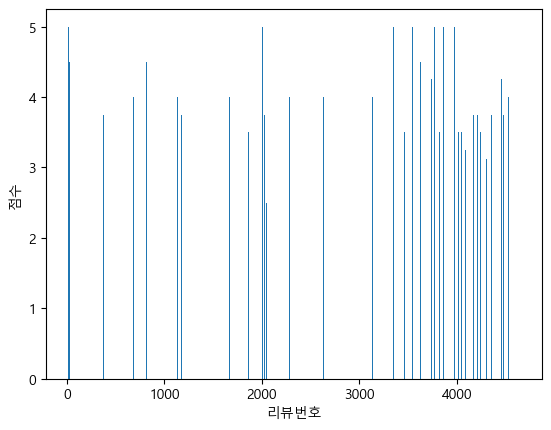

In [208]:
# [1] 점수별로 그려보기 
# 인덱스의 값이 리뷰 번호이기때문에 공통분모가 없어서 무지막지하게 나온다.
plt.bar(target_DF.index,height= target_DF['Stars'])
plt.xlabel('리뷰번호')
plt.ylabel('점수')
plt.show()

In [185]:
# 점수별로 간단하게 분포를 확인하기 위해 int 타입으로 바꾸고 막대 그래프를 그려본다
target_stars_counts_DF = target_DF['Stars'].astype(dtype='int16')

In [186]:
target_stars_counts_DF

16      5
26      4
39      1
75      5
117     5
       ..
4634    3
4635    2
4636    3
4639    2
4641    2
Name: Stars, Length: 461, dtype: int16

In [187]:
a = np.array(target_stars_counts_DF)
cut = pd.cut(a, bins=[0,1,2,3,4,5], include_lowest= True )

In [188]:
target_stars_counts_DF.value_counts()

Stars
3    179
4    152
5     86
2     32
1      9
0      3
Name: count, dtype: int64

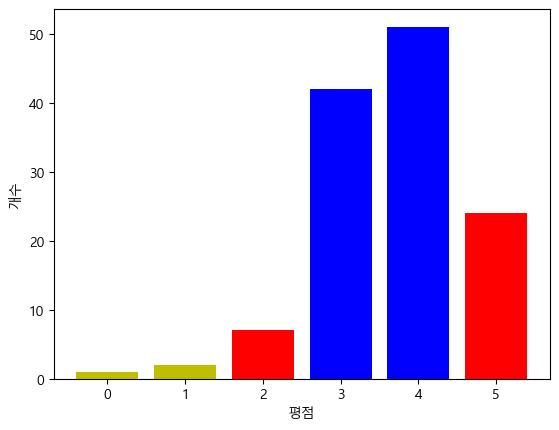

In [207]:
plt.bar(target_stars_counts_DF.value_counts().index,height=target_stars_counts_DF.value_counts(),color = ['b','b','r','r','y','y'])
plt.xlabel('평점')
plt.ylabel('개수')
plt.show()

##### 우리 라면의 신은 점수를 짜게 주지 않는 편이라는 것을 알수 있으며 가장 일반적인 3점을 많이 준다.
- 0점과 1점 2점인 데이터가 무엇인지 확인해보자.

In [190]:
# 브랜드에 따라 점수를 주는 것은 없어보이며 자기만의 기준이 있다.
# https://www.theramenrater.com/2010/10/07/paldo-green-tea-chlorella-noodles/
target_DF[(target_DF['Stars']>=0) &(target_DF['Stars']<=1)]

,Review #,Brand,Variety,Style,Country,Stars
233,4417,Pink Rocket,For The Lovely Girls' Mac & Cheese Rapokki,Bowl,South Korea,1.0
2131,2519,Guava Story,Anchovy Flavor Guava Rice Noodles,Tray,South Korea,1.0
2268,2382,Nongshim,Seaweed Instant Noodle,Cup,South Korea,0.5
2633,2017,Samyang Foods,Honey & Cheese Big Bowl,Bowl,South Korea,0.0
3232,1418,Ottogi,Ppushu Ppushu Grilled Chicken Flavor,Pack,South Korea,1.0
4489,161,Paldo,Green Tea Chlorella,Pack,South Korea,0.0


In [191]:
# 현 라면 트렌드에 따라 매운 라면이 상위에 랭크되어있음을 알수 있다.
target_DF[(target_DF['Stars']>=5) ]

,Review #,Brand,Variety,Style,Country,Stars
16,4634,The Han Kitchen,Budae Ramyun,Pack,South Korea,5.0
75,4575,Nongshim,Shin Ramyun Bokkeummyeon,Pack,South Korea,5.0
117,4533,Ottogi,Jin Jjambbong Spicy Seafood Noodle,Pack,South Korea,5.0
167,4483,Samyang Foods,Buldak Yakisoba HOT Chicken Flavor Ramen,Pack,South Korea,5.0
175,4475,Samyang Foods,Rosé Buldak Stir-fried Noodles\n,Pack,South Korea,5.0
...,...,...,...,...,...,...
3899,751,Nongshim,Shin Ramyun Black Onion,Cup,South Korea,5.0
3905,745,Nongshim,Jinjja Jinjja,Pack,South Korea,5.0
3976,674,Paldo,Kko Kko Myun,Pack,South Korea,5.0
4084,566,Foodmon,DJ DOC Jjolmyeon,Bowl,South Korea,5.0


In [192]:
# 브랜드 평가
# (target_DF['Brand'].value_counts()>=7)
# brand_counts = target_DF['Brand'].value_counts()
# brands_to_include = brand_counts[brand_counts >= 7].index

# filtered_DF = target_DF[target_DF['Brand'].isin(brands_to_include)]

In [193]:
samyang_ramen = target_DF[target_DF['Brand'] == 'Samyang Foods']

In [194]:
samyang_ramen.shape

(127, 6)

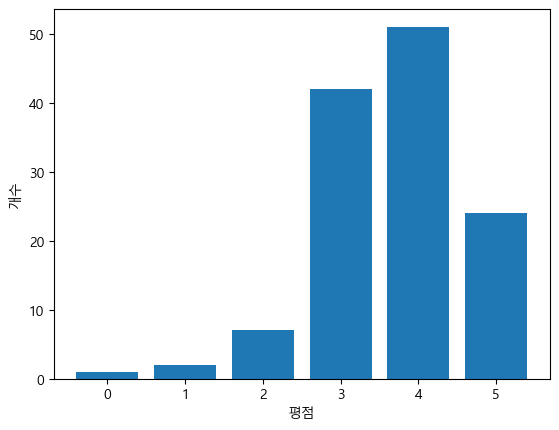

In [195]:
target_stars_counts_DF = samyang_ramen['Stars'].astype(dtype='int16')
a = np.array(target_stars_counts_DF)
cut = pd.cut(a, bins=[0,1,2,3,4], include_lowest= True )
plt.bar(target_stars_counts_DF.value_counts().index,height=target_stars_counts_DF.value_counts())
plt.xlabel('평점')
plt.ylabel('개수',)
plt.show()

In [196]:
# 점수가 5점대인 라면들의 특성 분석
from wordcloud import WordCloud

In [197]:
top_keyword = []
for i in target_DF.loc[target_DF['Stars']==5]['Variety']:
    a=i.split(' ')
    for h in a:
        top_keyword.append(h)

In [198]:
top_keyword

['Budae',
 'Ramyun',
 'Shin',
 'Ramyun',
 'Bokkeummyeon',
 'Jin',
 'Jjambbong',
 'Spicy',
 'Seafood',
 'Noodle',
 'Buldak',
 'Yakisoba',
 'HOT',
 'Chicken',
 'Flavor',
 'Ramen',
 'Rosé',
 'Buldak',
 'Stir-fried',
 'Noodles\n',
 'Buldak',
 'Cream',
 'Carbonara',
 'Artificial',
 'Hot',
 'Chicken',
 'Flavor',
 'Ramen',
 'Spicy',
 'Topokki',
 'With',
 'Rose',
 'Sauce',
 'For',
 'The',
 'Lovely',
 "Girls'",
 'Original',
 'Rapokki',
 '‘For',
 'The',
 'Lovely',
 'Girls’',
 'Carbonara',
 'Rabokki',
 'You',
 'US',
 'Omori',
 'Kimchi',
 'Stew',
 'Ramyun',
 'Bibim',
 'Tteokbokki',
 'Cheese',
 'Rapokki',
 'Cheese',
 'Ramyun',
 'Mac',
 '&',
 'Cheese',
 'Spaghetti',
 'Shin',
 'Light',
 'Air',
 'Dried',
 'Noodle',
 'Soup',
 'Mr',
 'Kimchi',
 'Stirfried',
 'Kimchi',
 'Ramen',
 'Bul',
 'Jjamppong',
 'Buldak',
 'Light',
 'Big',
 'Gomtang',
 'Instant',
 'Noodle',
 'Soup',
 'Mix',
 'King',
 'Lid',
 'Ramen',
 'Noodle',
 'Soup',
 'Big',
 '3',
 'Instant',
 'Ramen',
 'Bowl',
 'Mr.',
 'Kimchi',
 'Stirfried',
 

In [199]:
# 키워드 삭제
while 'Ramen' in top_keyword:
    top_keyword.remove('Ramen')

while 'Noodle' in top_keyword:
    top_keyword.remove('Noodle')

while 'Ramyun' in top_keyword:
    top_keyword.remove('Ramyun')

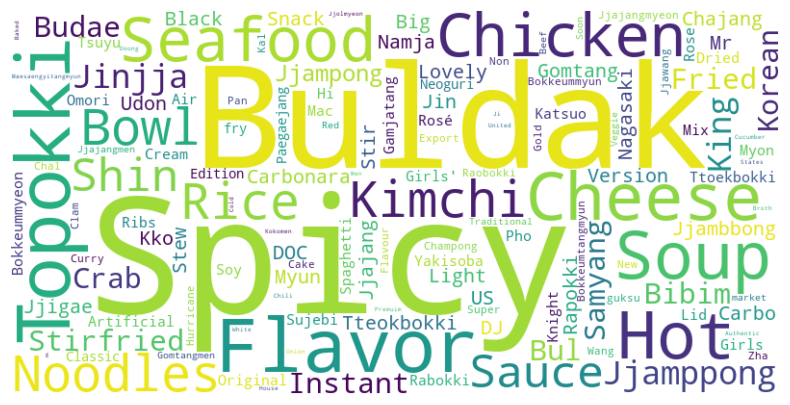

In [200]:
text = ' '.join(top_keyword)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [201]:
# 하위 라면 키워드 탐색

In [202]:
top_keyword = []
for i in target_DF.loc[target_DF['Stars']==2]['Variety']:
    a=i.split(' ')
    for h in a:
        top_keyword.append(h)

for i in target_DF.loc[target_DF['Stars']==1]['Variety']:
    a=i.split(' ')
    for h in a:
        top_keyword.append(h)

In [203]:
while 'Ppushu' in top_keyword:
    top_keyword.remove('Ppushu')

while 'Noodle' in top_keyword:
    top_keyword.remove('Noodle')

while 'Ramen' in top_keyword:
    top_keyword.remove('Ramen')

while 'Buldak' in top_keyword:
    top_keyword.remove('Buldak')

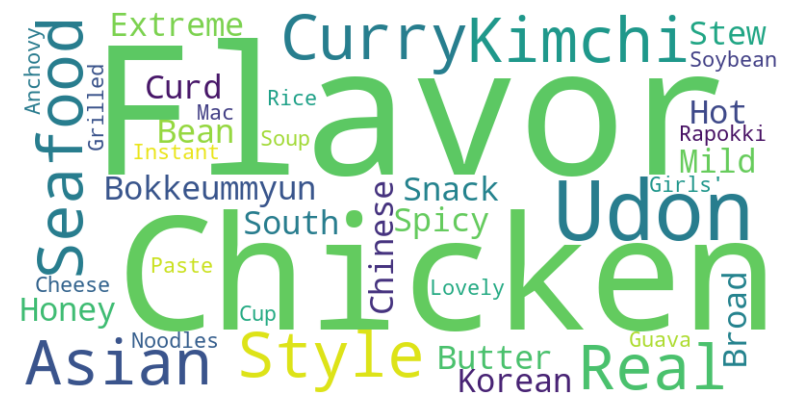

In [204]:
text = ' '.join(top_keyword)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [205]:
## 같은 카테고리 치킨을 확인
# 높은 순위의 치킨은 붉닭볶음면 탕 같은 일반적인 라면들
# 낮은 순위의 치킨라면은 양념치킨 라면같은 매운맛이 없고 단맛만 첨가된 라면들